## 도형그리기
- 각 함수들은 원본 이미지에 도형을 그린다.
- cv2.line(img, pt1, pt2, color, tickness=None, lineType=None, shift):img
    - 선그리기
    - 매개변수
        - img: 그릴 대상 이미지
        - pt1, pt2: 직선의 시작/끝점. 각각 튜플(x, y)
        - color: 선색 또는 밝기 (B,G,R) 튜플 또는 정수
        - thickness: 선 두께. 기본값=1 (픽셀)
        - lineType: 선 타입. cv2.LINE_4, cv2.LINE_8(기본값), cv2.LINE_AA(부드러운 형태) 중 선택. 일직선이 아니면 LINE_AA를 준다.
    - 반환값
       - 선을 그린 image (ndarray) 반환 (모든 도형함수 동일)

- cv2.rectangle(img, pt1, pt2, color, thickness=None, lineType=None):img
- cv2.rectangle(img, rec, color, thickness=None, lineType=None):img
    - 사각형 그리기
    - 매개변수
        - pt1, pt2: 좌측상단, 우측하단 좌표. 튜플 (x, y)
        - rec: 사각형의 위치정보(x, y, w, h) 튜플지정.
        - thickness: 도형에서는 -1을 주면 내부를 채운다. 


- cv2.circle(img, center, radius, color, thickness=None, lineStyle=None): img
    - 원 그리기. 원의 lineType은 LINE_AA (안티 알리애싱)을 주면 부드럽게 그려진다. 
    - 매개변수
        - center: 원의 중심좌표. 튜플 (x,y)
        - radius: 반지름

- CV2.polylines(img, pts, isClosed, color, thinkness=None, lineType=None): img
    - 다각형을 그린다.
    - 매개변수
        - pts: 다각형의 외곽점들의 좌표배열. ndarray 리스트 (ex: \[np.array[[10,10],[50,50], [10,10]])\] => 리스트로 감싸서 넣는다.
        - isClosed: bool. 폐곡선 여부. 시작점과 끝점을 연결할지 여부.

- cv2.putText(img, text, org, fontFace, fontScale, color, thickness=None, lineType=None): img
    - 문자열을 출력. 영문/숫자만 지원(한글 지원안함.)
    - 매개변수
        - text: 출력할 문자열
        - org: 이미지에서 문자열을 출력할 위치. 좌측 하단의 좌표를 튜플로 지정 (x,y)
        - fontFace: 폰트 종류. cv2.FONT_HERSHEY_ 로 시작하는 상수 중 선택
        - fontScale: 폰트 크기 확대/축소 비율. 1이 기본. 1을 기준으로 정한다.

In [1]:
import cv2
import numpy as np

def create_windows(*args):
    cv2.imshow(*args)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [2]:
img = np.full((400, 400, 3), fill_value=255, dtype=np.uint8)

create_windows('frame', img)

In [3]:
cv2.line(img, (50, 50), (200, 50), color=(0, 0, 255), thickness=5)

create_windows('frame', img)

In [4]:
cv2.line(img, (50, 50), (150, 160), color=(0, 255, 255), thickness=5, lineType=cv2.LINE_AA)

create_windows('frame', img)

In [5]:
# 사각형 그리기
# 좌상단, 우하단 좌표
cv2.rectangle(img, (50, 200), (150, 300), color=(255, 255, 0), thickness=-1, lineType=cv2.LINE_4)
# 좌상단X, 좌상단Y, W, H
# 선두께 -1이면 채움
cv2.rectangle(img, (70, 220, 100, 100), color=(255, 0, 255), thickness=3, lineType=cv2.LINE_8)

create_windows('frame', img)

In [7]:
# 원 그리기
# 중심좌표, 반지름
cv2.circle(img, (300, 100), 30, color=(255, 0, 0), thickness=-1, lineType=cv2.LINE_AA)
# 선두께 -1이면 채움
cv2.circle(img, (300, 100), 60, color=(255, 0, 0), thickness=3, lineType=cv2.LINE_AA)

create_windows('frame', img)

In [8]:
# 다각형 그리기
# 꼭지점 좌표
pts = np.array([[250, 200], [300, 200], [350, 300], [250, 300]])
cv2.polylines(img, [pts],
                isClosed=True,          # 닫힌 도형 여부
                color=(255, 255, 100),      # 색상
                thickness=2,            # 선 두께, -1이면 채움
                lineType=cv2.LINE_AA,
                )

create_windows('frame', img)

In [11]:
# 글자 그리기
cv2.putText(img,
            text='Hello',                       # 표시할 문자열
            org=(50, 350),                      # 문자열의 시작점(좌측 하단 기준)
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,  # 폰트
            fontScale=1.0,                      # 폰트 크기
            color=(0, 0, 0),                    # 색상
            thickness=2,                        # 선 두께
            lineType=cv2.LINE_AA,               # 선 타입
            )

create_windows('frame', img)

### Lenna Image에 텍스트 그리기
Lenna Forsen

In [15]:
txt = 'Lenna Forsen'
lenna = cv2.imread('./images/lenna.bmp')

create_windows('frame', lenna)

In [17]:
txt = 'Lenna Forsen'
lenna = cv2.imread('./images/lenna.bmp')

cv2.rectangle(lenna,
              (200, 200), (370, 400),
              (0, 0, 255),
              2,
              cv2.LINE_8,
              )

create_windows('frame', lenna)

In [2]:
txt = 'Lenna Forsen'
lenna = cv2.imread('./images/lenna.bmp')

cv2.rectangle(lenna,
            (200, 200), (370, 400),
            (0, 0, 255),
            3,
            cv2.LINE_8,
            )

cv2.putText(lenna,
            text=txt,
            org=(180, 440),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.0,
            color=(255, 255, 255),
            thickness=2,
            lineType=cv2.LINE_AA,
            )

create_windows('frame', lenna)

## 이미지 Crop
- open cv는 이미지를 numpy의 ndarray를 이용해 연산하기 때문에 image의 특정 영역의 좌표만 알면 그 영역을 잘라낼 수 있다.

In [3]:
lenna_crop = lenna[180:450, 175:395]

create_windows('frame', lenna_crop)

In [4]:
lenna_face = lenna[200:400, 200:370]

create_windows('frame', lenna_face)

## 영상의 기하학적 변환
- 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 전체 영상의 모양을 바꾸는 작업

### 이동 변환 (Translation Transformation)
- 가로 또는 세로 방향으로 영상을 이동시키는 변환
- X축과 Y축 방향으로 이동 변위를 지정
- 그림을 가로(X축) 으로 a 만큼 , 세로(Y축)으로 b만큼 이동할 경우
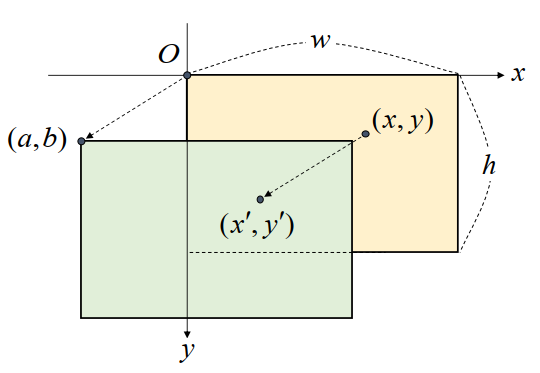

$$
\,각\,좌표들을 (a,b)\,만큼\,더한다.
\large{
    \begin{cases}
    x'=x+a\\
    y'= y+b
    \end{cases}
}
$$


<hr>


$$
행렬곱으로\,표현\\
\large{
    \begin{bmatrix}
    x'\\
    y'
    \end{bmatrix}=
    \begin{bmatrix}
    1 & 0 & a \\
    0 & 1 & b
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
    x\\y\\1
    \end{bmatrix}
}\\
이동을 위한 2\times3\,어파인\,변환\,행렬 \\
\begin{bmatrix}
1 & 0 & a \\
0 & 1 & b
\end{bmatrix}
$$



- cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None)
    - 매개변수
        - src: 원본 영상
        - M: $2\times3$ 어파인 변환 행렬. 실수형
        - dsize: 결과 영상의 크기를 (w, h) 튜플로 지정. (0,0) 이면 같은 크기
        - flags: 보간법
        - borderMode: 영상이 이동해서 생기는 빈공간을 채우는 방식. default: cv2.BORDER_CONSTANT (검정색으로 채운다.)
            - borderValue: cv2.BORDER_CONSTANT 일때 채울 색. (B, G, R) 로 지정

In [21]:
lenna = cv2.imread('./images/lenna.bmp')

affine_metrix = np.array([  [1, 0, 100],    # 1, 0, 좌우이동
                            [0, 1, 200]]    # 0, 1, 상하이동
                        , dtype=np.float32)

moved = cv2.warpAffine( lenna,
                        M= affine_metrix,
                        dsize= (0,0),
                        flags= cv2.INTER_LINEAR,
                        borderMode= cv2.BORDER_WRAP,
                        )

create_windows('frame', moved)

### 전단 변환(Shear transformation)
- 직사각형 형태의 영상을 한쪽 방향으로 밀어서 평행사변형 모양으로 변형되는 변환으로 층밀림 변환이라고도 한다.
    - 한축 방향으로 이동하는데 기준축에 비례해서 다르게 이동한다.
- X축과 Y축에 대해 따로 정의 한다.
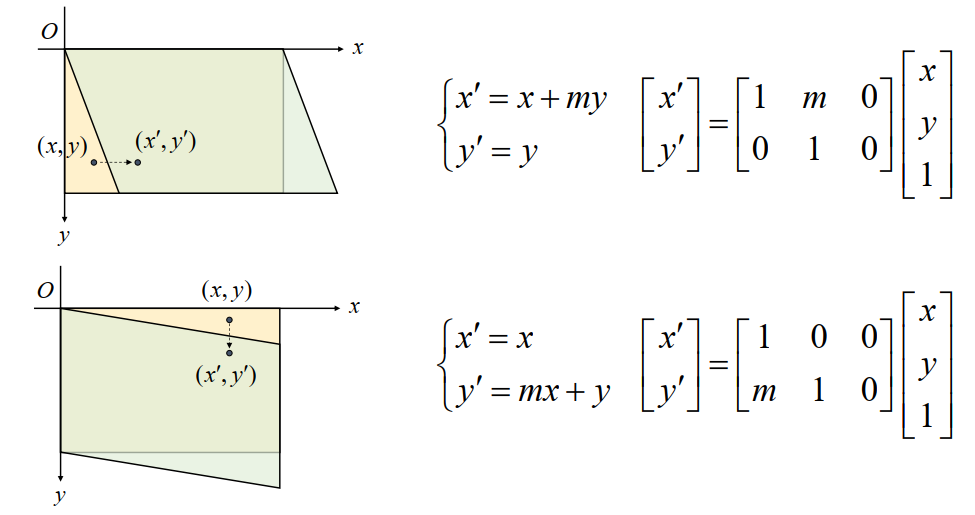
<center>m: 비율</center>

In [34]:
shear_metrix = np.array([   [1, 0.5, 100],    # 1, 좌우전단비율, 좌우이동
                            [0.1, 1, 300]]    # 상하전단비율, 1, 상하이동
                        , dtype=np.float32)

sheared = cv2.warpAffine(lenna,
                        M= shear_metrix,
                        dsize= (0,0),
                        flags= cv2.INTER_LINEAR,
                        borderMode= cv2.BORDER_WRAP,
                        )

create_windows('frame', sheared)

In [53]:
# -1~1 순서로 1000개의 숫자를 생성
x_shs = np.linspace(-5, 5, 1000)
# 1~-1 순서로 1000개의 숫자를 생성
y_shs = np.linspace(10, -10, 1000)
# -100~100 순서로 1000개의 숫자를 생성
x_trs = np.linspace(-2000, 2000, 1000)
# -100~100 순서로 1000개의 숫자를 생성
y_trs = np.linspace(1000, -1000, 1000)
# 1~2 순서로 500개 , 2~1 순서로 500개
x_s = np.concatenate([np.linspace(1, 2, 500), np.linspace(2, 1, 500)])
# 2~1 순서로 500개
y_s = np.concatenate([np.linspace(2, 1, 500), np.linspace(1, 2, 500)])
# 초당 프레임 설정
fps = 120

shape0, shape1 = lenna.shape[:2]

for x_sh, y_sh, x_tr, y_tr, x_, y_ in zip(x_shs, y_shs, x_trs, y_trs, x_s, y_s):
    metrixs = np.array([    [1, x_sh, x_tr],
                            [y_sh, 1, y_tr]]
                        , dtype=np.float32)
    
    sheared = cv2.warpAffine(lenna,
                            M= metrixs,
                            dsize= (int(shape1*x_), int(shape0*y_)),
                            flags= cv2.INTER_LINEAR,
                            borderMode= cv2.BORDER_WRAP,
                            )
    
    cv2.putText(sheared,
                f'x_sh: {x_sh:.2f}, y_sh: {y_sh:.2f}, x_tr: {x_tr:.2f}, y_tr: {y_tr:.2f}',
                org=(10, 30),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.5,
                color=(0, 255, 0),
                thickness=1,
                lineType=cv2.LINE_AA,
                )
    
    cv2.imshow('frame', sheared)
    # 1초에 30번 프레임을 보여줌
    cv2.waitKey(int(1000/fps))
    
    # esc키를 누르면 종료
    if cv2.waitKey(5) == 27:
        break

cv2.destroyAllWindows()

In [77]:
PIE = np.pi
x= np.linspace(0, 4*PIE, 1000)
sinx = np.sin(x)
cosx = np.cos(x)

fps = 120

for sin_, cos_ in zip(sinx, cosx):
    metrixs = np.array([    [1, sin_, sin_*shape1],
                            [cos_, 1, cos_*shape0]]
                        , dtype=np.float32)
    
    sheared = cv2.warpAffine(lenna,
                            M= metrixs,
                            dsize= (int(shape1*abs(sin_)), int(shape0*abs(cos_))),
                            flags= cv2.INTER_LINEAR,
                            borderMode= cv2.BORDER_WRAP,
                            )
    
    resized = cv2.resize(sheared, 
                        dsize=(0, 0),
                        fx=1 + abs(sin_),
                        fy=1 + abs(cos_),
                        interpolation=cv2.INTER_LINEAR,
                        )
    
    cv2.putText(sheared,
                f'sinx: {sin_:.2f}, cosx: {cos_:.2f}',
                org=(10, 30),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.5,
                color=(0, 255, 0),
                thickness=1,
                lineType=cv2.LINE_AA,
                )
    
    cv2.imshow('frame', sheared)
    # 1초에 30번 프레임을 보여줌
    cv2.waitKey(int(1000/fps))
    
    # esc키를 누르면 종료
    if cv2.waitKey(5) == 27:
        break

cv2.destroyAllWindows()

## 크기 조절(확대/축소 - Resize)
- cv2.resize(src, dsize\[, fx, fy, interpolation\])
    - 매개변수
        - src: 원본 이미지 
        - dsize: 조절할 이미지 크기 (width, height)
        - fx, fy: 상대적 크기로 지정한다. (dsize는 0,0 으로 설정한다. dsize를 설정하면 dsize가 우선한다.)
        - interpolation: 보간 방법
             - 크기를 조절할 때 본래는 없는 값을 메우는 작업이 필요한데, 이를 interpolation(보간법)이라고 한다.
    - 반환값
        - ndarray: resize된 이미지반환
        
### Interpolation 상수
- cv2.INTER_NEAREST: 이웃보간법. nearest neighbor interpolation이라고도 하며, 주변 이웃 pixel값을 가져와 빈공간을 채운다. 가장 빠르지만 화질이 좋지 않다.
- cv2.INTER_LINEAR: 쌍 선형보간법.(2x2 이웃픽셀을 계산해서 만든다.) resize의 default 방식. 연산속도가 빠르고 화질도 좋아서 많이 사용된다.
- cv2.INTER_CUBIC - 바이큐빅 보간법.(4x4 이웃픽셀을 계산해서 만든다.)  INTER_LINEAR보다 화질이 좋고 lancozs보다 계산량이 적어 많이 사용된다.
- cv2.INTER_LANCZOS4 - Lanczos보간법.(8x8 이웃픽셀을 계산해서 만든다.) 가장 부드럽게 값을 메우지만 연산이 많이 필요하다.
- cv2.INTER_AREA: 영역보간법. 크기를 **축소**할 때 많이 사용한다. 확대할 때는 nearest neighbor와 유사하다.
- 일반적으로 쌍 선형보간법(INTER_LINEAR)을 많이 쓴다.
    - 이미지 확대: 바이큐빅, 쌍 선형 보간법을 가장 많이 사용
    - 이미지 축소: 영역 보간법을 많이 사용.
    
### Interpolation 비교
- **upsampling**
    - nearest와 area는 계단현상이 발생
    - linear는 edge가 smooth된 효과가 발생
    - cubic과 lancozs는 edge가 shapen되는 효과
- **downsampling**
    - area는 pixel 관계에 따라 resampling하기 때문에 상대적으로 부드럽게 변환된다.
    - 나머지는 계단현상이 많이 발생한다.

In [72]:
rose = cv2.imread('./images/rose.bmp')

# 두배 늘리기
rose_2x = cv2.resize(rose,
                    dsize=(0, 0),
                    fx=2.0,
                    fy=2.0,
                    interpolation=cv2.INTER_LANCZOS4,
                    )

# 두배 축소
rose_05x = cv2.resize(rose,
                    dsize=(0, 0),
                    fx=0.5,
                    fy=0.5,
                    interpolation=cv2.INTER_AREA
                    )

imgs = {'rose': rose, 'rose_2x': rose_2x, 'rose_05x': rose_05x}

import matplotlib.pyplot as plt

# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# for ax, (title, img) in zip(axes, imgs.items()):
#     ax.imshow(img[:, :, ::-1])
#     ax.set_title(title)
#     # ax.axis('off')

for title, img in imgs.items():
    cv2.imshow(title, img)
cv2.waitKey()
cv2.destroyAllWindows()

In [71]:
# 두배 늘리기
rose = cv2.imread('./images/rose.bmp')
inters = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]
names = ['NEAREST', 'LINEAR', 'CUBIC', 'LANCZOS4']
imgs = []
for inter in inters:
    imgs.append(cv2.resize(rose,
                            dsize=(0, 0),
                            fx=2.0,
                            fy=2.0,
                            interpolation=inter,
                            ))

# fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# for ax, (title, img) in zip(axes.flatten(), zip(names, imgs)):
#     ax.imshow(img[:, :, ::-1])
#     ax.set_title(title)
    # ax.axis('off')
    
for img, name in zip(imgs, names):
    cv2.imshow(name, img)
cv2.waitKey()
cv2.destroyAllWindows()

In [75]:
# 두배 늘리기
rose = cv2.imread('./images/rose.bmp')

img2 =  cv2.resize( rose,
                    dsize=(0, 0),
                    fx=2.0,
                    fy=1.0,
                    interpolation=inter,
                    )

# fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# for ax, (title, img) in zip(axes.flatten(), zip(names, imgs)):
#     ax.imshow(img[:, :, ::-1])
#     ax.set_title(title)
    # ax.axis('off')
    
cv2.imshow('frame', img2)
cv2.waitKey()
cv2.destroyAllWindows()

### 대칭변환(Flip)
- cv2.flip(src, flipCode)
- 매개변수
    - src: 원본소스
    - flipCode: 대칭방향지정
        - 양수: 좌우대칭
        - 0: 상하대칭
        - 음수: 좌우/상하 대칭


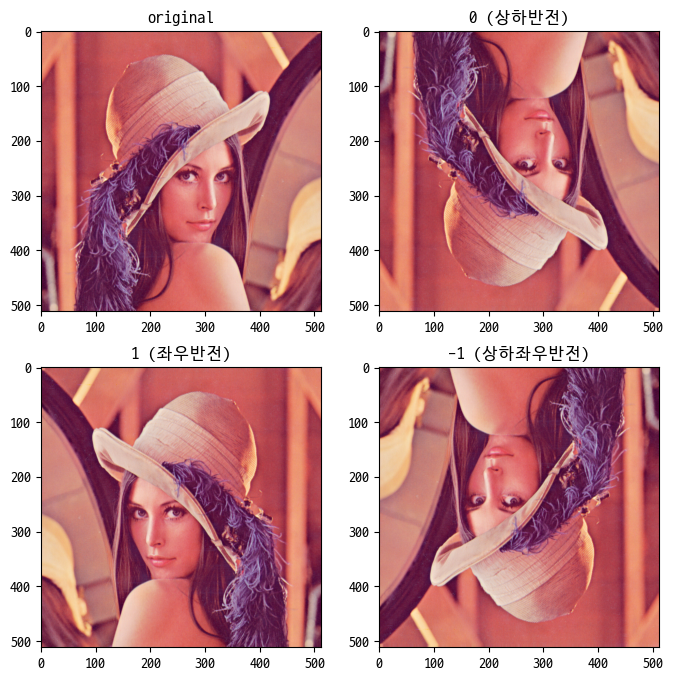

In [80]:
lenna = cv2.imread('./images/lenna.bmp')

upside_down_lenna = cv2.flip(lenna, 0)
left_right_lenna = cv2.flip(lenna, 1)
upside_down_left_right_lenna = cv2.flip(lenna, -1)

imgs = [lenna, upside_down_lenna, left_right_lenna, upside_down_left_right_lenna]
names = ['original', '0 (상하반전)', '1 (좌우반전)', '-1 (상하좌우반전)']

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for ax, (title, img) in zip(axes.flatten(), zip(names, imgs)):
    ax.imshow(img[:, :, ::-1])
    ax.set_title(title)
    # ax.axis('off')

## 회전(Rotate)
- cv.rotate(src, rotateCode): img
    - 매개변수
        - src: 회전시킬 원본이미지
        - rotateCode: 회전각도 상수
            - **ROTATE_90_CLOCKWISE**: 시계방향 90도
            - **ROTATE_180**: 180도 회전
            - **ROTATE_90_COUNTERCLOCKWISE**: 반시계방향 90도(시계방향 270도)
- 원하는 각도만큼 회전.
    - 얼마나 회전할지 getRotationMatrix2D()를 이용해 어파인 변환 행렬을 생성.
    - **warpAffine()**을 이용해 회전 처리
    - **getRotationMatrix2D(center, angle, scale)**
        - 2x3 회전을 위한 어파인 변환 행렬 생성
        - center: 회전의 중심점 좌표, 튜플형태로 지정
        - angle: 중심점을 기준으로 회전할 각도(양수: 반시계방향, 음수: 시계방향)
        - scale: 이미지 확대 및 축소 비율
    - **warpAffine(src, M, dsize)**
        - 회전 처리
        - src: 회전시킬 대상 이미지 배열.
        - M:  getRotationMatrix2D()가 반환한 어파인 변환 행렬을 사용
        - dsize: 출력이미지 크기        

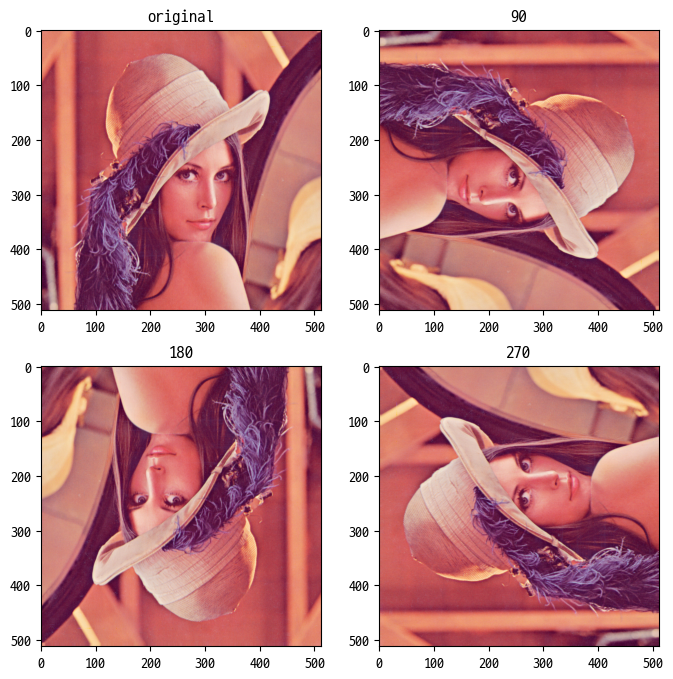

In [84]:
lenna = cv2.imread('./images/lenna.bmp')

imgs = [lenna]

rotates = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE]

for rotate in rotates:
    imgs.append(cv2.rotate(lenna, rotate))

names = ['original', '90', '180', '270']

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for ax, (title, img) in zip(axes.flatten(), zip(names, imgs)):
    ax.imshow(img[:, :, ::-1])
    ax.set_title(title)
    # ax.axis('off')

In [91]:
x = np.linspace(0, 4*np.pi, 1000)
sinx = np.sin(x)
cosx = np.cos(x)

rotates = np.linspace(0, 3600, 1000)

center = (lenna.shape[1]//2, lenna.shape[0]//2)

metrixes = []
for rotate, sinx_ in zip(rotates, sinx):
    metrixes.append(cv2.getRotationMatrix2D(center,
                                            rotate,
                                            1+sinx_,
                                            ))

for metrix, rotate, sinx_ in zip(metrixes, rotates, sinx):
    rotated = cv2.warpAffine(lenna,
                            M= metrix,
                            dsize= (0,0),
                            flags= cv2.INTER_LINEAR,
                            borderMode= cv2.BORDER_WRAP,
                            )
    
    cv2.putText(rotated,
                f'rotate: {rotate:.2f}, scale: {1+sinx_:.2f}',
                org=(10, 30),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.5,
                color=(0, 255, 0),
                thickness=1,
                lineType=cv2.LINE_AA,
                )
            
    
    cv2.imshow('frame', rotated)
    # 1초에 30번 프레임을 보여줌
    cv2.waitKey(int(1000/fps))
    
    # esc키를 누르면 종료
    if cv2.waitKey(5) == 27:
        break
    
cv2.destroyAllWindows()

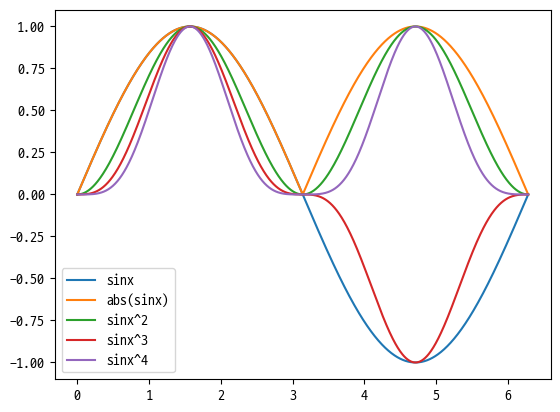

In [94]:
x = np.linspace(0, 2*np.pi, 1000)
sinx = np.sin(x)
abssinx = np.abs(sinx)
sinxsquare = sinx**2
sinx3square = sinx**3
sinx4square = sinx**4

plt.plot(x, sinx, label='sinx')
plt.plot(x, abssinx, label='abs(sinx)')
plt.plot(x, sinxsquare, label='sinx^2')
plt.plot(x, sinx3square, label='sinx^3')
plt.plot(x, sinx4square, label='sinx^4')
plt.legend()